In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVR

In [ ]:
count = 1
for i in range(1988,2020):
    df =  pd.read_csv('sta_108_018.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    start_date = str(i)+'-07-01'
    end_date =   str(i)+'-08-31'
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    df = df.loc[mask]
    if count == 1:
        df.to_csv('MSD.csv')
    else:
        df.to_csv('MSD.csv',mode='a', header=False)
    count=count+1


# SVM (Dry Season)

In [32]:
# read dry.csv file using pandas library and save as dataframe
df1 =  pd.read_csv('dry.csv')
# drop by Name
df1 = df1.drop(['Unnamed: 0','Date'], axis=1)
df1.head()

,d2m_PO,msl_C,msl_PO,q_p500,sst_C,sst_PO,t2m,t2m_PO,tcc_PO,mn2t,...,u_p925_C,v10,v10_PO,v_p500,z_p200,RH,Qsat,Tx2m,Tn2m,Pr
0,23.814704,101246.659655,100945.026585,0.002043,26.971079,28.260106,21.809319,27.338324,0.760809,21.540698,...,-20.771315,-2.522886,-4.506832,3.713996,121810.607142,98.995862,0.013376,30.6,25.6,0.0
1,23.814704,101246.659655,100945.026585,0.002043,26.971079,28.260106,21.809319,27.338324,0.760809,21.540698,...,-20.771315,-2.522886,-4.506832,3.713996,121810.607142,98.995862,0.013376,30.6,25.6,0.0
2,23.672191,101195.138787,100954.466142,0.002004,26.937159,28.247803,22.073277,26.586746,0.649874,21.807065,...,-18.317517,-2.146178,-3.004726,3.713996,121894.927559,99.135260,0.013948,31.4,NaN,0.0
3,23.672191,101195.138787,100954.466142,0.002004,26.937159,28.247803,22.073277,26.586746,0.649874,21.807065,...,-18.317517,-2.146178,-3.004726,3.713996,121894.927559,99.135260,0.013948,31.4,NaN,0.0
4,23.903134,101168.289693,100937.304540,0.002536,26.884462,28.208255,21.590038,26.817644,0.474207,21.400759,...,-18.593686,-2.223517,-2.540115,3.972917,121896.198928,98.991321,0.013184,31.2,22.2,0.0


In [33]:
from sklearn.model_selection import train_test_split

# Take 70% of the data for training and the rest for test

train_set, test_set = train_test_split(df1, test_size=0.3)

# Separate labels from the training dataset

Tx2m_train = train_set['Tx2m'] # Label 1
Tn2m_train = train_set['Tn2m'] # Label 2
Pr_train = train_set['Pr'] # Label 3

# Separate featuers columns from the training dataset   

features_train = train_set.iloc[:,0:22] 

Tx2m_test = test_set['Tx2m'] # Label 1
Tn2m_test = test_set['Tn2m'] # Label 2
Pr_test = test_set['Pr'] # Label 3
features_test = test_set.iloc[:,0:22]



Tx2m_train=Tx2m_train.fillna(999)

Tn2m_train=Tn2m_train.fillna(999)

Pr_train=Pr_train.fillna(999)



In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [4, 8, 16, 32, 64],
                  'gamma': [0.005,0.05], }
clf = GridSearchCV(
        SVR(kernel='rbf'), param_grid,
    )
clf = clf.fit(features_train, Tx2m_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)


In [ ]:
from sklearn.metrics import *
print("Best estimator found by grid search:")
print(clf.best_estimator_)

# We handle missing data by inserting zeros 
Tx2m_test=Tx2m_test.fillna(999)
Tn2m_test=Tn2m_test.fillna(999)
Pr_test=Pr_test.fillna(999)

y_pred = clf.predict(features_test)
mae_sd = mean_absolute_error(Tx2m_test, y_pred)
mse_sd = mean_squared_error(Tx2m_test, y_pred)
rmse_sd = np.sqrt(mse_sd) # or mse**(0.5)  
r2_sd = r2_score(Tx2m_test,y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae_sd)
print("MSE:", mse_sd)
print("RMSE:", rmse_sd)
print("R-Squared:", r2_sd)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {'C': [4, 8, 16, 32, 64],
              'gamma': [0.005,0.05], }
clf_1 = GridSearchCV(
    SVR(kernel='rbf'), param_grid1
)
clf_1 = clf_1.fit(features_train, Tn2m_train)
print("Best estimator found by grid search:")
print(clf_1.best_estimator_)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid2 = {'C': [4, 8, 16, 32, 64],
              'gamma': [0.005,0.05], }
clf2 = GridSearchCV(
    SVR(kernel='rbf'), param_grid2
)
clf2 = clf2.fit(features_train, Pr_train)
print("Best estimator found by grid search:")
print(clf2.best_estimator_)

In [ ]:

y_predTn = clf_1.predict(features_test)
mae_sdTn = mean_absolute_error(Tn2m_test, y_predTn)
mse_sdTn = mean_squared_error(Tn2m_test, y_predTn)
rmse_sdTn = np.sqrt(mse_sdTn) # or mse**(0.5)  
r2_sdTn = r2_score(Tn2m_test,y_predTn)

print("Results of Dry (Tn2m) ")
print("MAE:",mae_sdTn)
print("MSE:", mse_sdTn)
print("RMSE:", rmse_sdTn)
print("R-Squared:", r2_sdTn)


y_predP = clf2.predict(features_test)
mae_sdP = mean_absolute_error(Pr_test, y_predP)
mse_sdP = mean_squared_error(Pr_test, y_predP)
rmse_sdP = np.sqrt(mse_sdP) # or mse**(0.5)  
r2_sdP = r2_score(Pr_test,y_predP)

print("Results of Dry (Pr) ")
print("MAE:",mae_sdP)
print("MSE:", mse_sdP)
print("RMSE:", rmse_sdP)
print("R-Squared:", r2_sdP)

# Rainy (SVM)

In [ ]:
df2 =  pd.read_csv('rainy.csv')
# drop by Name
df2 = df2.drop(['Unnamed: 0','Date'], axis=1)

# Take 70% of the data for training and the rest for test
train_set_r, test_set_r = train_test_split(df2, test_size=0.3)

Tx2m_train_r = train_set_r['Tx2m'] # Label 1
Tn2m_train_r = train_set_r['Tn2m'] # Label 2
Pr_train_r = train_set_r['Pr'] # Label 3
features_train_r = train_set_r.iloc[:,0:22] 

Tx2m_test_r = test_set_r['Tx2m'] # Label 1
Tn2m_test_r = test_set_r['Tn2m'] # Label 2
Pr_test_r = test_set_r['Pr'] # Label 3
features_test_r = test_set_r.iloc[:,0:22]

Tx2m_train_r=Tx2m_train_r.fillna(999)
Tn2m_train_r=Tn2m_train_r.fillna(999)
Pr_train_r=Pr_train_r.fillna(999)

# Tx2n (Rainy )
param_gridr1 = {'C': [4, 8, 16, 32, 64],
              'gamma': [0.005,0.05], }
clf_sr = GridSearchCV(
    SVR(kernel='rbf'), param_gridr1
)
clf_sr = clf_sr.fit(features_train_r, Tx2m_train_r)
print("Best estimator found by grid search Rainy (Tx2m) :")
print(clf_sr.best_estimator_)

# Tn2n (Rainy)

param_gridr2 = {'C': [4, 8, 16, 32, 64],
              'gamma': [0.005,0.05], }
clf_sr1 = GridSearchCV(
    SVR(kernel='rbf'), param_gridr2
)
clf_sr1 = clf_sr1.fit(features_train_r, Tn2m_train_r)
print("Best estimator found by grid search Pr (Tn2m) :")
print(clf_sr1.best_estimator_)

# Pr (Rainy)

param_gridr3 = {'C': [4, 8, 16, 32, 64],
              'gamma': [0.005,0.05], }
clf_sr2 = GridSearchCV(
    SVR(kernel='rbf'), param_gridr3
)
clf_sr2 = clf_sr2.fit(features_train_r, Pr_train_r)
print("Best estimator found by grid search Pr (Rainy) :")
print(clf_sr2.best_estimator_)




In [ ]:
Tx2m_test_r=Tx2m_test_r.fillna(999)
Tn2m_test_r=Tn2m_test_r.fillna(999)
Pr_test_r=Pr_test_r.fillna(999)


y_pred_sr = clf_sr.predict(features_test_r)
mae_srTx = mean_absolute_error(Tx2m_test_r, y_pred_sr)
mse_srTx = mean_squared_error(Tx2m_test_r, y_pred_sr)
rmse_srTx = np.sqrt(mse_srTx) # or mse**(0.5)  
r2_srTx = r2_score(Tx2m_test_r,y_pred_sr)

print("Results of Rainy (Tx2m)")
print("MAE:",mae_srTx)
print("MSE:", mse_srTx)
print("RMSE:", rmse_srTx)
print("R-Squared:", r2_srTx)

y_predsrTn = clf_sr1.predict(features_test_r)
mae_srTn = mean_absolute_error(Tn2m_test_r, y_predsrTn)
mse_srTn = mean_squared_error(Tn2m_test_r, y_predsrTn)
rmse_srTn = np.sqrt(mse_srTn) # or mse**(0.5)  
r2_srTn = r2_score(Tn2m_test_r,y_predsrTn)

print("Results of Rainy (Tn2m) ")
print("MAE:",mae_srTn)
print("MSE:", mse_srTn)
print("RMSE:", rmse_srTn)
print("R-Squared:", r2_srTn)


y_prerP = clf_sr2.predict(features_test_r)
mae_srP = mean_absolute_error(Pr_test_r, y_prerP)
mse_srP = mean_squared_error(Pr_test_r, y_prerP)
rmse_srP = np.sqrt(mse_srP) # or mse**(0.5)  
r2_srP = r2_score(Pr_test_r,y_prerP)

print("Results of Rainy (Pr) ")
print("MAE:",mae_srP)
print("MSE:", mse_srP)
print("RMSE:", rmse_srP)
print("R-Squared:", r2_srP)

# MSD SVM

In [ ]:
df3 =  pd.read_csv('MSD.csv')
# drop by Name
df3 = df3.drop(['Unnamed: 0','Date'], axis=1)

from sklearn.model_selection import train_test_split
# Take 70% of the data for training and the rest for test
train_set_m, test_set_m = train_test_split(df1, test_size=0.3)

Tx2m_train_m = train_set_m['Tx2m'] # Label 1
Tn2m_train_m = train_set_m['Tn2m'] # Label 2
Pr_train_m = train_set_m['Pr'] # Label 3
features_train_m = train_set_m.iloc[:,0:22] 

Tx2m_test_m = test_set_m['Tx2m'] # Label 1
Tn2m_test_m = test_set_m['Tn2m'] # Label 2
Pr_test_m = test_set_m['Pr'] # Label 3
features_test_m = test_set_m.iloc[:,0:22]

Tx2m_test_m=Tx2m_test_m.fillna(999)
Tn2m_test_m=Tn2m_test_m.fillna(999)
Pr_test_m=Pr_test_m.fillna(999)

Tx2m_train_m=Tx2m_train_m.fillna(999)
Tn2m_train_m=Tn2m_train_m.fillna(999)
Pr_train_m=Pr_train_m.fillna(999)

# Tx2n (msd )
param_gridm1 = {'C': [4, 8, 16, 32, 64],
              'gamma': [0.005,0.05], }
clf_sm = GridSearchCV(
    SVR(kernel='rbf'), param_gridm1
)
clf_sm = clf_sm.fit(features_train_m, Tx2m_train_m)
print("Best estimator found by grid search MSD (Tx2m) :")
print(clf_sm.best_estimator_)

# Tn2n (MSD)

param_gridm2 = {'C': [4, 8, 16, 32, 64],
              'gamma': [0.005,0.05], }
clf_sm1 = GridSearchCV(
    SVR(kernel='rbf'), param_gridm2
)
clf_sm1 = clf_sm1.fit(features_train_m, Tn2m_train_m)
print("Best estimator found by grid search  Tn2m (MSD) :")
print(clf_sm1.best_estimator_)

# Pr (MSD)

param_gridm3 = {'C': [4, 8, 16, 32, 64],
              'gamma': [0.005,0.05], }
clf_sm2 = GridSearchCV(
    SVR(kernel='rbf'), param_gridm3
)
clf_sm2 = clf_sm2.fit(features_train_m, Pr_train_m)
print("Best estimator found by grid search Pr (MSD) :")
print(clf_sm2.best_estimator_)


In [ ]:
y_pred_sm = clf_sm.predict(features_test_m)
mae_smTx = mean_absolute_error(Tx2m_test_m, y_pred_sm)
mse_smTx = mean_squared_error(Tx2m_test_m, y_pred_sm)
rmse_smTx = np.sqrt(mse_smTx) # or mse**(0.5)  
r2_smTx = r2_score(Tx2m_test_m,y_pred_sm)

print("Results of MSD (Tx2m):")
print("MAE:",mae_smTx)
print("MSE:", mse_smTx)
print("RMSE:", rmse_smTx)
print("R-Squared:", r2_smTx)

y_predsmTn = clf_sm1.predict(features_test_m)
mae_smTn = mean_absolute_error(Tn2m_test_m, y_predsmTn)
mse_smTn = mean_squared_error(Tn2m_test_m, y_predsmTn)
rmse_smTn = np.sqrt(mse_smTn) # or mse**(0.5)  
r2_smTn = r2_score(Tn2m_test_m,y_predsmTn)

print("Results of MSD (Tn2m) ")
print("MAE:",mae_smTn)
print("MSE:", mse_smTn)
print("RMSE:", rmse_smTn)
print("R-Squared:", r2_smTn)


y_premP = clf_sm2.predict(features_test_m)
mae_smP = mean_absolute_error(Pr_test_m, y_premP)
mse_smP = mean_squared_error(Pr_test_m, y_premP)
rmse_smP = np.sqrt(mse_smP) # or mse**(0.5)  
r2_smP = r2_score(Pr_test_m,y_premP)

print("Results of MSD (Pr) ")
print("MAE:",mae_smP)
print("MSE:", mse_smP)
print("RMSE:", rmse_smP)
print("R-Squared:", r2_smP)

In [34]:
df_col = pd.DataFrame(
    {
        "column_name": ["d2m_PO", "msl_C", "msl_PO", "q_p500", "sst_C", "sst_PO", "t2m","t2m_PO","tcc_PO","mn2t","tp","mx2t","u10","u10_PO","u_p500","u_p925_C","v10","v10_PO","v_p500","z_p200","RH","Qsat"],
    }
)

# Random Forest  (Dry Season)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.7min finished


Text(0.5, 0, 'Random Forest Feature Importance versus dry (Tx2m)')

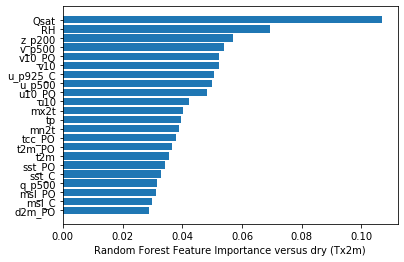

In [39]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'max_depth': [4, 8, 16],
    'n_estimators': [100, 200, 300]
}

randomf = RandomForestRegressor(n_estimators = 100)
# Fit the grid search model
randomf = GridSearchCV(estimator = randomf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Create the parameter grid based on the results of random search 
# Create a based model

randomf.fit(features_train, Tx2m_train)
sorted_idx = randomf.best_estimator_.feature_importances_.argsort()
plt.barh(df_col['column_name'], randomf.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance versus dry (Tx2m)")

In [ ]:
# Create a based model
rf1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf1 = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
rf1.fit(features_train, Tn2m_train)
sorted_idx = rf1.best_estimator_.feature_importances_.argsort()
plt.barh(df_col['column_name'], rf1.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance versus dry (Tn2m)")

# Create a based model
rf2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
# Instantiate the grid search model
rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
rf2.fit(features_train, Pr_train)
sorted_idx = rf2.feature_importances_.argsort()
plt.barh(df_col['column_name'], rf2.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance versus dry (Pr)")


In [ ]:
y_pred_rf = rf.predict(features_test)
mae_sdrf= mean_absolute_error(Tx2m_test, y_pred_rf)
mse_sdrf = mean_squared_error(Tx2m_test, y_pred)
rmse_sdrf = np.sqrt(mse_sdrf) # or mse**(0.5)  
r2_sdrf = r2_score(Tx2m_test,y_pred_rf)

print("Results of dry (Tx2m) Random forest:")
print("MAE:",mae_sdrf)
print("MSE:", mse_sdrf)
print("RMSE:", rmse_sdrf)
print("R-Squared:", r2_sdrf)

y_predTnrf = rf1.predict(features_test)
mae_sdTnrf = mean_absolute_error(Tn2m_test, y_predTnrf)
mse_sdTnrf = mean_squared_error(Tn2m_test, y_predTnrf)
rmse_sdTnrf = np.sqrt(mse_sdTnrf) # or mse**(0.5)  
r2_sdTnrf = r2_score(Tn2m_test,y_predTnrf)

print("Results of Dry (Tn2m) ")
print("MAE:",mae_sdTnrf)
print("MSE:", mse_sdTnrf)
print("RMSE:", rmse_sdTnrf)
print("R-Squared:", r2_sdTnrf)


y_predPrf = rf2.predict(features_test)
mae_sdPrf = mean_absolute_error(Pr_test, y_predPrf)
mse_sdPrf = mean_squared_error(Pr_test, y_predPrf)
rmse_sdPrf = np.sqrt(mse_sdPrf) # or mse**(0.5)  
r2_sdPrf = r2_score(Pr_test,y_predPrf)

print("Results of Dry (Pr) ")
print("MAE:",mae_sdPrf)
print("MSE:", mse_sdPrf)
print("RMSE:", rmse_sdPrf)
print("R-Squared:", r2_sdPrf)



# Random Forest (Rainy)

In [ ]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
rfr.fit(features_train_r, Tx2m_train_r)

sorted_idx = rfr.best_estimator_.feature_importances_.argsort()
plt.barh(df_col['column_name'], rfr.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance versus Rainy (Tn2m)")
# Create a based model
rf1r = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf1r = GridSearchCV(estimator = rf1r, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
rf1r.fit(features_train_r, Tn2m_train_r)
sorted_idx = rf1r.best_estimator_.feature_importances_.argsort()
plt.barh(df_col['column_name'], rf1r.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance versus Rainy (Tn2m)")
# Create a based model
rf2r = RandomForestRegressor(n_estimators = 100, random_state = 0)
# Instantiate the grid search model
rf2r = GridSearchCV(estimator = rf2r, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
rf2r.fit(features_train_r, Pr_train_r)

sorted_idx = rf2r.best_estimator_.feature_importances_argsort()
plt.barh(df_col['column_name'], rf2r.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance versus Rainy (Pr)")


In [ ]:
y_pred_rfr = rfr.predict(features_test_r)
mae_sdrfr= mean_absolute_error(Tx2m_test_r, y_pred_rfr)
mse_sdrfr = mean_squared_error(Tx2m_test_r, y_pred_rfr)
rmse_sdrfr = np.sqrt(mse_sdrfr) # or mse**(0.5)  
r2_sdrfr = r2_score(Tx2m_test_r,y_pred_rfr)

print("Results of Rainy (Tx2m) Random forest:")
print("MAE:",mae_sdrfr)
print("MSE:", mse_sdrfr)
print("RMSE:", rmse_sdrfr)
print("R-Squared:", r2_sdrfr)

y_predTnrfr = rf1r.predict(features_test_r)
mae_sdTnrfr = mean_absolute_error(Tn2m_test_r, y_predTnrfr)
mse_sdTnrfr = mean_squared_error(Tn2m_test_r, y_predTnrfr)
rmse_sdTnrfr = np.sqrt(mse_sdTnrfr) # or mse**(0.5)  
r2_sdTnrfr = r2_score(Tn2m_test_r,y_predTnrfr)

print("Results of Rainy (Tn2m) ")
print("MAE:",mae_sdTnrfr)
print("MSE:", mse_sdTnrfr)
print("RMSE:", rmse_sdTnrfr)
print("R-Squared:", r2_sdTnrfr)


y_predPrfr = rf2r.predict(features_test_r)
mae_sdPrfr = mean_absolute_error(Pr_test_r, y_predPrfr)
mse_sdPrfr = mean_squared_error(Pr_test_r, y_predPrfr)
rmse_sdPrfr = np.sqrt(mse_sdPrfr) # or mse**(0.5)  
r2_sdPrfr = r2_score(Pr_test_r,y_predPrfr)

print("Results of Rainy (Pr) ")
print("MAE:",y_predPrfr)
print("MSE:", mae_sdPrfr)
print("RMSE:", rmse_sdPrfr)
print("R-Squared:", r2_sdPrfr)


# Random Forest (MSD)

In [ ]:
rfm = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfm = GridSearchCV(estimator = rfm, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
rfm.fit(features_train_m, Tx2m_train_m)

sorted_idx = rfm.best_estimator_.feature_importances_.argsort()
plt.barh(df_col['column_name'], rfm.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance versus MSD (Tx2m)")
# Create a based model
rf1m = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf1m = GridSearchCV(estimator = rf1m, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
rf1m.fit(features_train_m, Tn2m_train_m)
sorted_idx = rf1m.best_estimator_.feature_importances_.argsort()
plt.barh(df_col['column_name'], rf1m.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance versus MSD (Tn2m)")
# Create a based model
rf2m = RandomForestRegressor(n_estimators = 100, random_state = 0)
# Instantiate the grid search model
rf2m = GridSearchCV(estimator = rf2m, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
rf2m.fit(features_train_m, Pr_train_m)

sorted_idx = rf2m.best_estimator_.feature_importances_.argsort()
plt.barh(df_col['column_name'], rf2m.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance versus MSD (Pr)")

In [ ]:
y_pred_rfm = rfr.predict(features_test_m)
mae_sdrfm= mean_absolute_error(Tx2m_test_m, y_pred_rfm)
mse_sdrfm = mean_squared_error(Tx2m_test_m, y_pred_rfm)
rmse_sdrfm = np.sqrt(mse_sdrfm) # or mse**(0.5)  
r2_sdrfm = r2_score(Tx2m_test_m,y_pred_rfm)

print("Results of MSD (Tx2m) Random forest:")
print("MAE:",mae_sdrfm)
print("MSE:", mse_sdrfm)
print("RMSE:", rmse_sdrfm)
print("R-Squared:", r2_sdrfm)

y_predTnrfm = rf1m.predict(features_test_m)
mae_sdTnrfm = mean_absolute_error(Tn2m_test_m, y_predTnrfm)
mse_sdTnrfm = mean_squared_error(Tn2m_test_m, y_predTnrfm)
rmse_sdTnrfm = np.sqrt(mse_sdTnrfm) # or mse**(0.5)  
r2_sdTnrfm = r2_score(Tn2m_test_m,y_predTnrfm)

print("Results of MSD (Tn2m) ")
print("MAE:",mae_sdTnrfm)
print("MSE:", mse_sdTnrfm)
print("RMSE:", rmse_sdTnrfm)
print("R-Squared:", r2_sdTnrfm)
 

y_predPrfm = rf2r.predict(features_test_m)
mae_sdPrfm = mean_absolute_error(Pr_test_m, y_predPrfm)
mse_sdPrfm = mean_squared_error(Pr_test_m, y_predPrfm)
rmse_sdPrfm = np.sqrt(mse_sdPrfm) # or mse**(0.5)  
r2_sdPrfm = r2_score(Pr_test_m,y_predPrfm)

print("Results of MSD (Pr) ")
print("MAE:",y_predPrfm)
print("MSE:", mae_sdPrfm)
print("RMSE:", rmse_sdPrfm)
print("R-Squared:", r2_sdPrfm)


In [ ]:
import numpy as np

N = 3
svm_dry = (mse_sd,mse_sdTn,mse_sdP)
random_f_dry = ( mse_sdrf,mse_sdTnrf,mse_sdPrf)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, svm_dry, width, label='SVM')
plt.bar(ind + width, random_f_dry, width,
    label='Random Forest ')

plt.ylabel('MSE')
plt.title(' Dry Season Comparison ')

plt.xticks(ind + width / 2, ('Tx2m', 'Tn2m', 'Pr'))
plt.legend(loc='best')
plt.show()


In [ ]:
import numpy as np

N = 3
svm_dry = (mse_srTx,mse_srTx,mse_srP)
random_f_dry = (mse_sdrfr,mse_sdTnrfr,mse_sdPrfr)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, svm_dry, width, label='SVM')
plt.bar(ind + width, random_f_dry, width,
    label='Random Forest ')

plt.ylabel('MSE')
plt.title(' Rainy Season Comparison ')

plt.xticks(ind + width / 2, ('Tx2m', 'Tn2m', 'Pr'))
plt.legend(loc='best')
plt.show()


In [ ]:
import numpy as np

N = 3
svm_dry = (mse_smTx , mse_smTn , mse_smP)
random_f_dry = (mse_sdrfm,mse_sdTnrfm,mse_sdPrfm)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, svm_dry, width, label='SVM')
plt.bar(ind + width, random_f_dry, width,
    label='Random Forest ')

plt.ylabel('MSE')
plt.title(' MSD Season Comparison ')

plt.xticks(ind + width / 2, ('Tx2m', 'Tn2m', 'Pr'))
plt.legend(loc='best')
plt.show()